
# 1. Import libraries


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For better plot style
sns.set(style="whitegrid")

# 2. Load Titanic dataset (train.csv)

In [5]:
df = pd.read_csv("train.csv")

# 3. Basic Info & Statistics

In [7]:
print("=== Data Info ===")
df.info()

print("\n=== Summary Statistics (numeric) ===")
print(df.describe())

print("\n=== Summary Statistics (all columns) ===")
print(df.describe(include='all'))

print("\n=== Value Counts for key categorical columns ===")
categorical_cols = ['Sex', 'Pclass', 'Embarked', 'Survived']
for col in categorical_cols:
    if col in df.columns:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts(dropna=False))

=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

=== Summary Statistics (numeric) ===
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.

 # Observations : Titanic Dataset Summary
Total entries: 891 | Columns: 12

-Missing values: Age (177), Cabin (687), Embarked (2)

-Passenger Class: Mostly 3rd class (491 passengers)

-Sex: Mostly male (577 males, 314 females)

-Embarked: Mostly from Southampton (S)

-Survival rate: 342 survived, 549 did not survive (~38% survival)

-Age: Average ~30 years, range 0.42–80

-Fare: Average ~32, with some very high fares (up to $512)

 ## Key observations:

-Majority were male and in 3rd class.

-Survival rate was less than 40%.

-Some columns like Age and Cabin have many missing values.



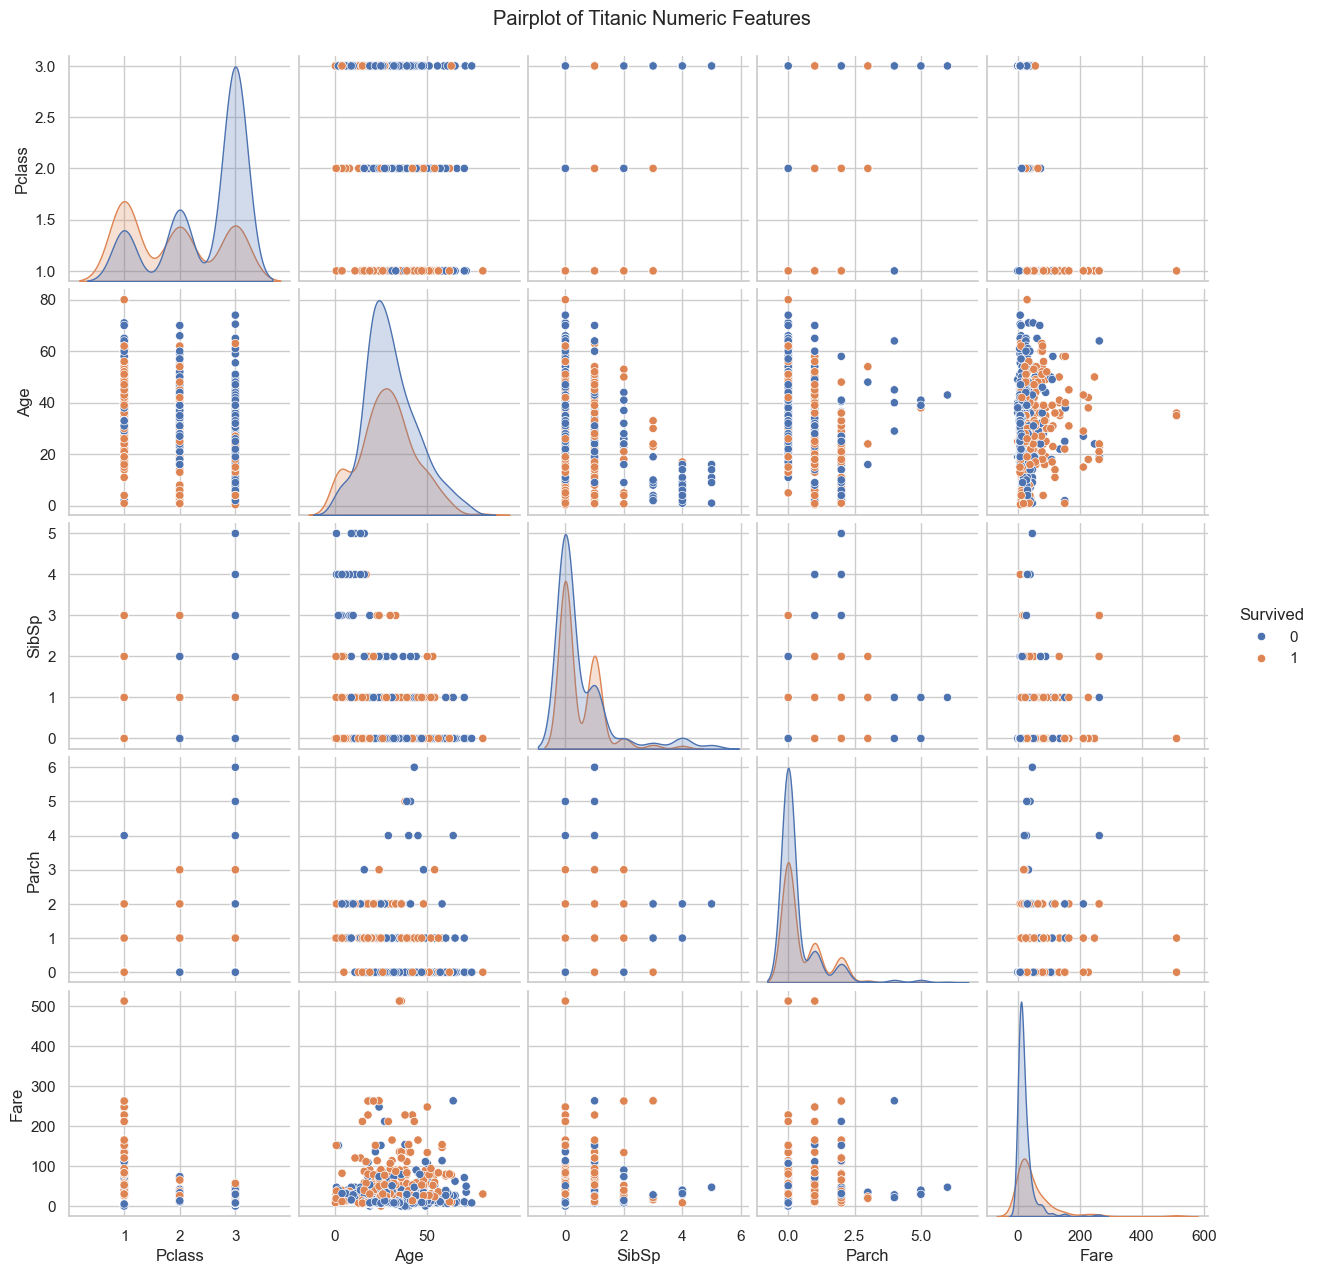

In [8]:
sns.pairplot(
    df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].dropna(), 
    hue='Survived', diag_kind='kde'
)
plt.suptitle("Pairplot of Titanic Numeric Features", y=1.02)
plt.show()

# Observations: Pairplot

Pairplot Observations:
1. Younger passengers had a higher survival rate compared to older ones.
2. Passengers in Pclass 1 had a better survival rate than those in lower classes.
3. Higher fare values are associated with higher survival chances.


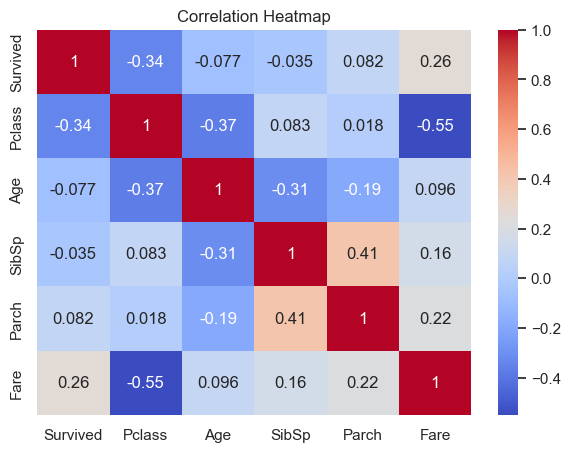

In [9]:
plt.figure(figsize=(7,5))
sns.heatmap(
    df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(),
    annot=True, cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.show()


#  Observations: Heatmap 

Heatmap Observations:
1. Survival has a negative correlation with Pclass (-0.34), meaning higher classes survived more.
2. Fare and Pclass are strongly negatively correlated (-0.55), higher class = higher fare.
3. Age does not have a strong correlation with survival.


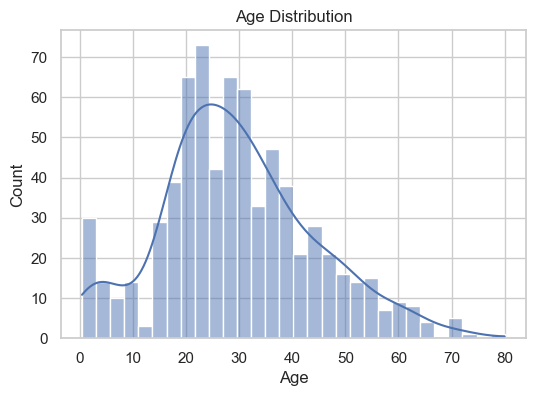

In [12]:
#Histogram for age
plt.figure(figsize=(6,4))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

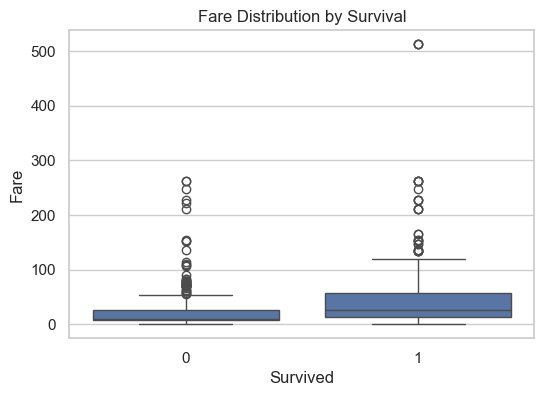

In [11]:
# Boxplot: Fare vs Survived
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by Survival")
plt.show()

#   Observations: Extra Plots 
Extra Plot Observations:
1. Most passengers were between 20–40 years old.
2. Survivors tended to have paid higher fares on average.


 # 7. Summary of Findings (f)
Summary of Findings:

- Higher class passengers (Pclass 1) had better survival chances.
- Females and younger passengers had a higher survival probability.
- Fare is positively related to survival — possibly indicating access to better cabins/lifeboats.
- SibSp and Parch have weak relationships with survival, but traveling with small family groups might have helped survival chances.
